In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =pd.read_csv('movie.csv',encoding='latin-1')

In [3]:
data.head(10)

,ï»¿text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [4]:
data.shape

(40000, 2)

In [5]:
data = data.iloc[:10000,:] #using only 10000 rows

In [6]:
data.shape

(10000, 2)

# working with Label

In [7]:
data['label'].value_counts() #0 for negative and 1 for positive 


label
0    5043
1    4957
Name: count, dtype: int64

In [8]:
data.rename(columns={'ï»¿text':'text'}, inplace =True)

<Axes: xlabel='label'>

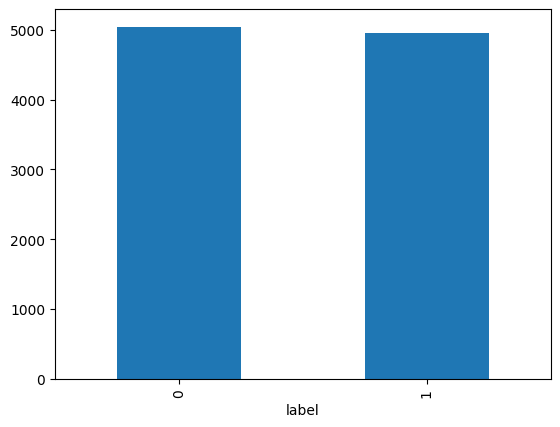

In [9]:
data['label'].value_counts().plot(kind ='bar')


Text(0.5, 1.0, 'Label Distribution')

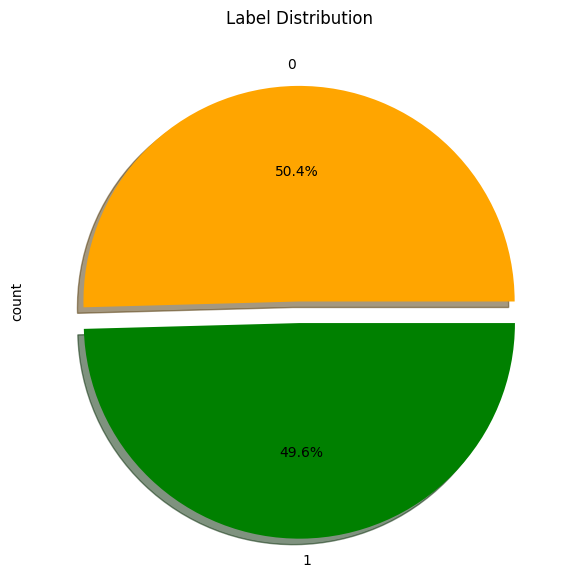

In [10]:
plt.figure(figsize=(12,7))
data['label'].value_counts().plot(kind ='pie' ,autopct = '%.1f%%', shadow = True , colors = {'green','orange'}, explode  =(0,0.1))

plt.title('Label Distribution')

# Working with text 

In [11]:
data['text'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

# Cleaning the text
    removing HTML tags
    Extracting the emojis
    Matching and extract the character from a given text
    removing special character , puntuation , symbols
    lower casting 
    removing stopwords
    tokenization

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
# Ensure that the stopwords corpus is downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords_set = set(stopwords.words('english')) # defining rthe stopword in english language 
# using set for doing execution fast by using only the unique words
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')
# defining the pattern for the emojis

def preprocessing(text):
    text = re.sub('<[^>]*>', '',text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    return " ".join(text)


In [15]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [16]:
data['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 10000, dtype: object

# Visualizing Negative and Positive words

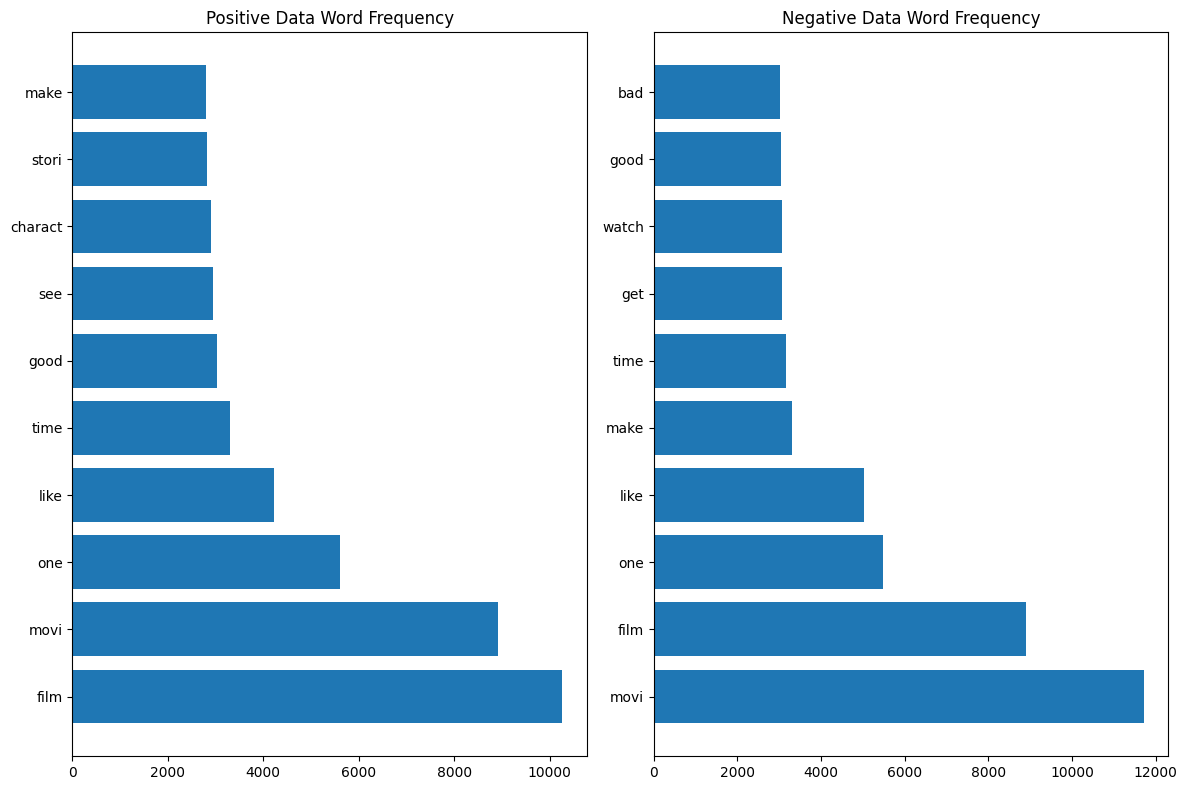

In [17]:
positivedata = data[data['label'] == 1]

positivedata = positivedata['text'] 
negdata = data[data['label'] == 0] 
negdata = negdata['text']


from collections import Counter

#Positive data

positivedata_words= ' '.join(positivedata).split() 
positivedata_word_counts = Counter(positivedata_words)

positivedata_common_words = positivedata_word_counts.most_common(10)

# negative data 
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)


#plotting
fig,axes = plt.subplots(1,2, figsize =(12,8))

# Positive data word frequency

axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align ='center')

axes[0].set_yticks(range(len(positivedata_common_words))) 

axes[0].set_yticklabels([word for word, _ in positivedata_common_words])

axes[0].set_title('Positive Data Word Frequency')

#Negative data word frequency

axes[1].barh(range (len(negdata_common_words)),[count for _, count in negdata_common_words],align ='center')
axes[1].set_yticks (range (len(negdata_common_words)))

axes[1].set_yticklabels([word for word, _ in negdata_common_words])

axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

# TF -IDF Vertorixe to convert the raw documents into feature matrix


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents= None , lowercase= False, preprocessor=None,use_idf= True ,norm ='l2',smooth_idf= True)
y = data.label.values
x = tfidf.fit_transform(data.text)

# Training Machine Learning Model for Sentiment Analysis

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state= 1, test_size= 0.5,shuffle=False)

In [20]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 6, scoring='accuracy',random_state=0, n_jobs=-1, verbose= 3, max_iter=500)
clf.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   34.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   44.3s finished


LogisticRegressionCV(cv=6, max_iter=500, n_jobs=-1, random_state=0,
                     scoring='accuracy', verbose=3)

In [21]:
y_pred = clf.predict(X_test)

# Accuracy

In [24]:
from sklearn import metrics
#  Model Accuracy , how often is the classifier correct ?
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8752


# Pickle File

In [25]:
import pickle 
pickle.dump(clf,open('clf.pkl', 'wb'))
pickle.dump(tfidf,open('tdidf.pkl','wb'))

# Prediction

In [27]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment] 
    comment_vector = tfidf.transform(comment_list)
    prediction =clf.predict(comment_vector)[0]
    return prediction


prediction = prediction('grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment')

In [28]:
if prediction ==1 :
    print("The prediction is positive")
else :
    print('This comment is negative')

This comment is negative


In [33]:
data['label'][5]


0

no
